In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# get 32 best features (lowest rmse)
df = pd.read_csv('best_nth_feature_cv0.csv')
df = df.sort_values(by='rmse_avg')
df = df.head(32)
with open("best_features_idx.txt", "w") as f:
    for line in df["nth_feature"]:
        f.write(str(line) + ",")

In [4]:
import scipy.stats as stats
df = pd.read_csv('best_nth_feature_cv0.csv')
zscore = -stats.zscore(df["rmse_avg"])
# set all negative values to 0
zscore = [max(0, x) for x in zscore]
# get index of positive features
positive_features = [i for i, x in enumerate(zscore) if x > 0]
positive_features
print(len(positive_features))

68


     Unnamed: 0  rmse_avg  rmse_std  nth_feature
0             0  0.526596  0.026475            0
1             1  0.524537  0.034623            1
2             2  0.524928  0.033865            2
3             3  0.522366  0.034856            3
4             4  0.524979  0.033381            4
..          ...       ...       ...          ...
195         195  0.532640  0.028168          195
196         196  0.532687  0.028750          196
197         197  0.533316  0.028600          197
198         198  0.531806  0.029281          198
199         199  0.513434  0.030022          199

[200 rows x 4 columns]


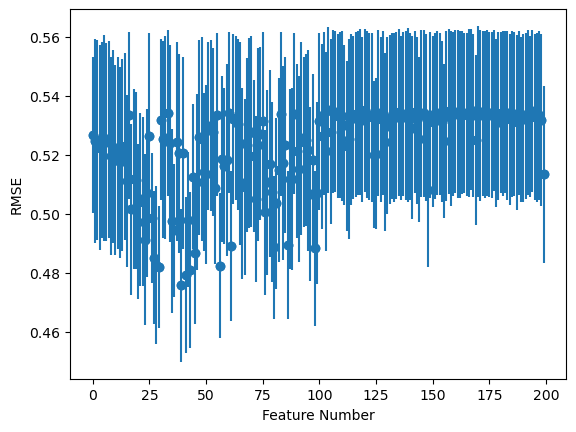

In [12]:
best_n_df = pd.read_csv('best_nth_feature_cv0.csv')
print(best_n_df)
# plot x: features and y: rmse and grey bar: std
plt.scatter(data=best_n_df, x="nth_feature", y="rmse_avg")
plt.errorbar(
    best_n_df["nth_feature"],
    best_n_df["rmse_avg"],
    yerr=best_n_df["rmse_std"],
    fmt="o",
)
plt.xlabel("Feature Number")
plt.ylabel("RMSE")

# save plot
plt.savefig(f"best_n_features.png")